In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'].insert(0,'AppleGothic')
%matplotlib inline

#tensorflow 
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler

C:\Users\user\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , GRU

Using TensorFlow backend.


# 데이터 정리 

In [5]:
data_all= pd.read_csv("data/data_all.csv", encoding = "utf-8", sep=",")

C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data_all.head()

,Unnamed: 0,대여일시,대여대여소번호,대여대여소,반납일시,반납대여소번호,반납대여소,이용시간(분),이용거리(M),대여요일,시간대,대여월,평균속력
0,0,2016-07-01 00:01:00,359,원남동사거리,2016-07-01 00:05:00,333,창덕궁 매표소 앞,3,680,5,0~3시,7,13.600000
1,1,2016-07-01 00:02:00,128,신촌역(2호선) 1번출구 옆,2016-07-01 00:12:00,126,서강대 후문 옆,9,1350,5,0~3시,7,9.000000
2,2,2016-07-01 00:03:00,302,경복궁역 4번출구 뒤,2016-07-01 00:10:00,351,청운초교 앞 삼거리,7,1290,5,0~3시,7,11.057143
3,3,2016-07-01 00:03:00,114,홍대입구역 8번출구 앞,2016-07-01 00:17:00,126,서강대 후문 옆,13,2550,5,0~3시,7,11.769231
4,4,2016-07-01 00:04:00,329,청계2가 사거리 옆,2016-07-01 00:16:00,339,종로4가 사거리,12,1200,5,0~3시,7,6.000000


In [7]:
# 필요없는 컬럼 삭제
del data_all['평균속력']
del data_all['이용거리(M)']
del data_all['Unnamed: 0']
del data_all['이용시간(분)']

In [8]:
여의나루대여 = data_all[data_all['대여대여소번호']=='207']
여의나루반납 = data_all[data_all['반납대여소번호']=='207']

In [9]:
여의나루대여=여의나루대여.sort_values(by="대여일시",ascending=False)
여의나루반납=여의나루반납.sort_values(by="대여일시",ascending=False)

In [10]:
여의나루대여=여의나루대여.pivot_table(index="대여일시",columns="대여대여소",values="대여대여소번호",aggfunc="count")

In [11]:
여의나루반납=여의나루반납.pivot_table(index="대여일시",columns="반납대여소",values="반납대여소번호",aggfunc="count")

In [12]:
여의나루대여.index= pd.to_datetime(여의나루대여.index)
여의나루반납.index = pd.to_datetime(여의나루반납.index)

In [13]:
여의나루30분대여 = 여의나루대여.resample('30T').count()
여의나루30분반납 = 여의나루반납.resample('30T').count()

In [14]:
여의나루30분대여.head(30)

대여대여소,여의나루역 1번출구 앞
대여일시,
2016-08-02 14:30:00,2
2016-08-02 15:00:00,3
2016-08-02 15:30:00,2
2016-08-02 16:00:00,2
2016-08-02 16:30:00,7
2016-08-02 17:00:00,1
2016-08-02 17:30:00,0
2016-08-02 18:00:00,0
2016-08-02 18:30:00,1


In [15]:
# 평일인데 휴일이었던 날 리스트
공휴일 = ['2016-08-15', '2016-09-14', '2016-09-15', '2016-09-16', '2016-10-03', '2017-01-27',
      '2017-01-30', '2017-03-04', '2017-05-03', '2017-05-05', '2017-05-09', '2017-06-06',
      '2017-08-15', '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
      '2017-10-09', '2017-12-25', '2018-01-01', '2018-02-15', '2018-02-16', '2018-03-01',
      '2018-05-07', '2018-05-22', '2018-06-06', '2018-06-13', ]

In [16]:
여의나루30분총 = 여의나루30분대여-여의나루30분반납

In [17]:
# timeindex의 시간이 공휴일리스트안에 있으면 True 없으면 False 리턴
여의나루30분총['공휴일'] = list(Series(여의나루30분총.index.strftime('%Y-%m-%d')).isin(공휴일))

In [18]:
여의나루30분총["대여월"] = 여의나루30분총.index.strftime('%m')
여의나루30분총["대여시간대(시)"] = 여의나루30분총.index.strftime('%H')
여의나루30분총["대여시간대(분)"] = 여의나루30분총.index.strftime('%M')
여의나루30분총["대여요일"] = 여의나루30분총.index.strftime('%w')

In [19]:
# 공휴일, 토요일, 일요일은 휴일(1), 그외 (0)
여의나루30분총['휴일'] = np.where((여의나루30분총['공휴일']==True)|(여의나루30분총['대여요일']=='0')|(여의나루30분총['대여요일']=='6') ,'1', '0')

In [20]:
del 여의나루30분총['공휴일']

In [21]:
여의나루30분총.head()

대여대여소,여의나루역 1번출구 앞,대여월,대여시간대(시),대여시간대(분),대여요일,휴일
대여일시,,,,,,
2016-08-02 14:30:00,0,08,14,30,2,0
2016-08-02 15:00:00,0,08,15,00,2,0
2016-08-02 15:30:00,-2,08,15,30,2,0
2016-08-02 16:00:00,1,08,16,00,2,0
2016-08-02 16:30:00,2,08,16,30,2,0


In [22]:
날씨=pd.read_csv('data/weather_final.csv',  encoding = "utf-8",sep=",")

In [23]:
날씨.head()

,일시,지점,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),CO,NO2,O3,PM10,PM25,SO2
0,2016-07-01 00:00:00,108.0,24.200000,0.0,214.040000,2.573333,999.016667,1008.716667,81.696667,0.248333,108.0,0.3,0.019,0.024,30.0,24.0,0.004
1,2016-07-01 00:30:00,108.0,24.273333,0.0,200.056667,2.830000,999.143333,1008.843333,81.013333,0.000000,0.0,0.3,0.019,0.024,30.0,24.0,0.004
2,2016-07-01 01:00:00,108.0,24.163333,0.0,218.180000,3.696667,999.283333,1008.983333,82.356667,0.000000,0.0,0.3,0.013,0.029,31.0,24.0,0.004
3,2016-07-01 01:30:00,108.0,23.916667,0.0,206.396667,2.953333,998.980000,1008.680000,84.806667,0.000000,0.0,0.3,0.013,0.029,31.0,24.0,0.004
4,2016-07-01 02:00:00,108.0,23.463333,0.0,204.623333,3.533333,998.873333,1008.636667,88.843333,0.000000,0.0,0.2,0.009,0.029,33.0,28.0,0.005


In [24]:
날씨=날씨[['일시','기온(°C)','누적강수량(mm)','풍속(m/s)','습도(%)','PM10','PM25']]

In [25]:
날씨=날씨.sort_values(by="일시")

In [26]:
날씨=날씨.iloc[1565:]
날씨.head()

,일시,기온(°C),누적강수량(mm),풍속(m/s),습도(%),PM10,PM25
1565,2016-08-02 14:30:00,30.536667,0.0,1.266667,55.543333,25.0,14.0
1566,2016-08-02 15:00:00,30.983333,0.0,0.810000,53.400000,28.0,16.0
1567,2016-08-02 15:30:00,30.820000,0.0,1.370000,56.363333,28.0,16.0
1568,2016-08-02 16:00:00,30.533333,0.0,3.250000,62.030000,28.0,17.0
1569,2016-08-02 16:30:00,30.096667,0.0,3.553333,58.693333,28.0,17.0


In [27]:
날씨['일시']= pd.to_datetime(날씨['일시'])

In [28]:
여의나루총합=pd.merge(여의나루30분총,날씨,left_index=True,right_index=False,left_on="대여일시",right_on='일시',how='outer')
여의나루총합.head()

,여의나루역 1번출구 앞,대여월,대여시간대(시),대여시간대(분),대여요일,휴일,일시,기온(°C),누적강수량(mm),풍속(m/s),습도(%),PM10,PM25
1565,0.0,08,14,30,2,0,2016-08-02 14:30:00,30.536667,0.0,1.266667,55.543333,25.0,14.0
1566,0.0,08,15,00,2,0,2016-08-02 15:00:00,30.983333,0.0,0.810000,53.400000,28.0,16.0
1567,-2.0,08,15,30,2,0,2016-08-02 15:30:00,30.820000,0.0,1.370000,56.363333,28.0,16.0
1568,1.0,08,16,00,2,0,2016-08-02 16:00:00,30.533333,0.0,3.250000,62.030000,28.0,17.0
1569,2.0,08,16,30,2,0,2016-08-02 16:30:00,30.096667,0.0,3.553333,58.693333,28.0,17.0


In [29]:
여의나루총합.index=여의나루총합["일시"]

In [30]:
del 여의나루총합["일시"]

In [31]:
여의나루총합["누적강수량(mm)"]=여의나루총합["누적강수량(mm)"].fillna(0)
여의나루총합["풍속(m/s)"]=여의나루총합["풍속(m/s)"].fillna(0)
여의나루총합["기온(°C)"]=여의나루총합["기온(°C)"].fillna(여의나루총합['기온(°C)'].mean())
여의나루총합["습도(%)"]=여의나루총합["습도(%)"].fillna(여의나루총합['습도(%)'].mean())
여의나루총합["PM10"]=여의나루총합["PM10"].fillna(여의나루총합['PM10'].mean())
여의나루총합["PM25"]=여의나루총합["PM25"].fillna(여의나루총합['PM25'].mean())

In [32]:
여의나루총합 = 여의나루총합[ 여의나루총합["대여월"].isnull() == False]

In [33]:
여의나루총합.to_csv("여의나루총합.csv",encoding='cp949')

# 누락 data 확인을 위한 plot

In [34]:
values = 여의나루총합.values
groups = [0,1,2,3,5,6,7,8,9,10,11]  #컬럼 갯수
i = 1

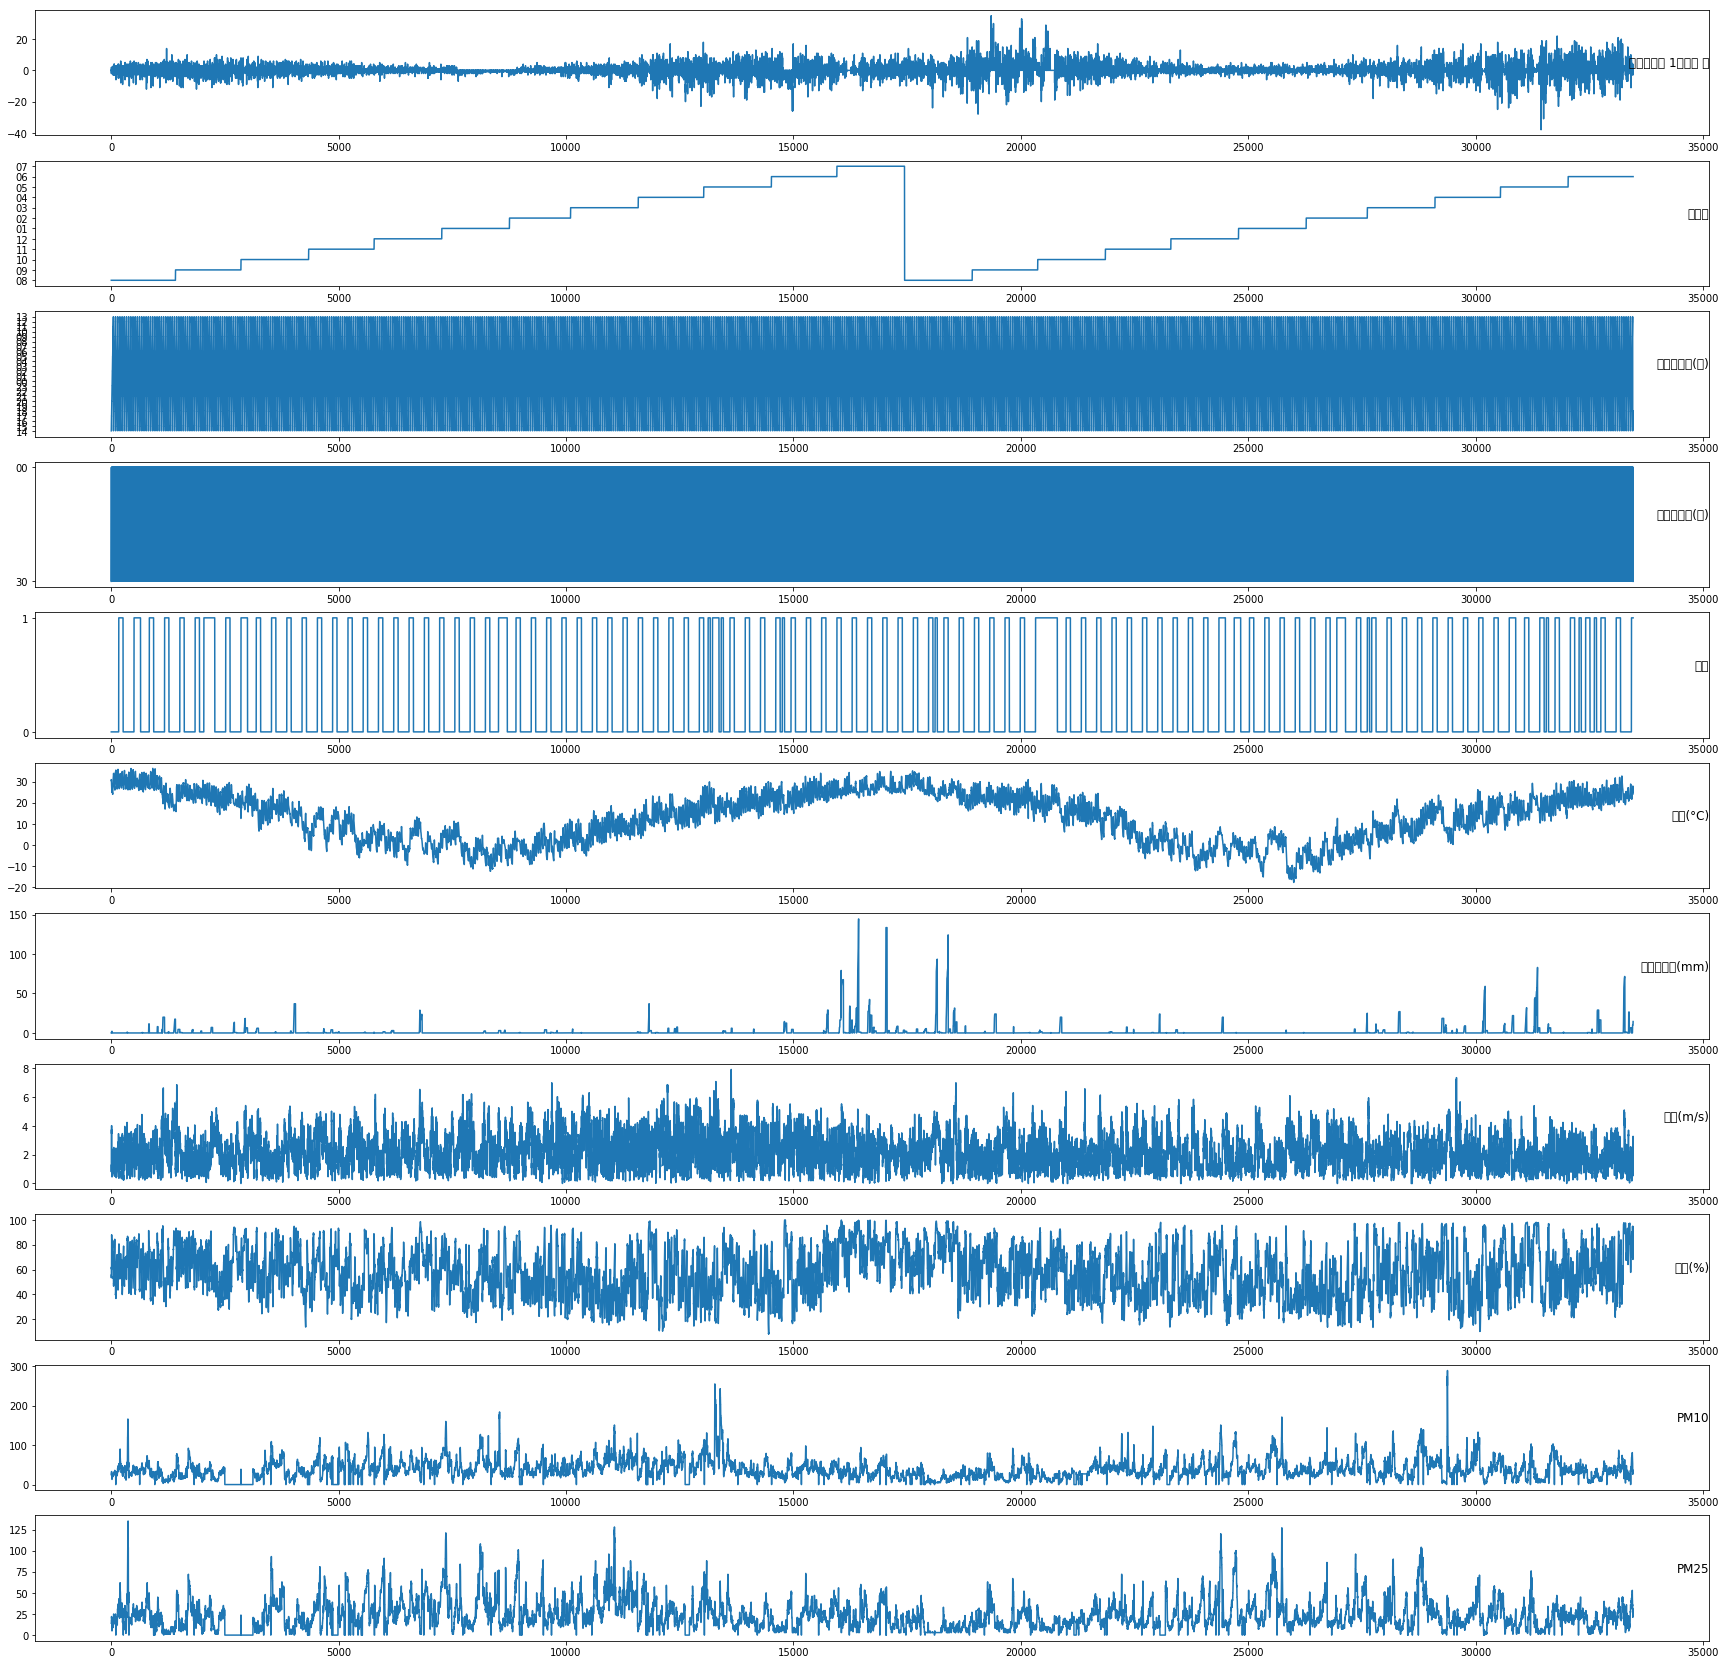

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'].insert(0,'AppleGothic')
pyplot.figure(figsize=(30,30))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(여의나루총합.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# supervised learning 변환 

In [37]:
# series를 supervised learning을 위해 변환 

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# t: 30분 변수, 30분을 1로 간주 
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# 예측용 
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# 합치기 
	agg = concat(cols, axis=1)
	agg.columns = names
  # nan 값 바꾸기 
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [38]:
values = 여의나루총합.values
values = values.astype('float32')

#형태 바꾸기 

reframed = series_to_supervised(values, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0        8.0       14.0       30.0        2.0        0.0   
2        0.0        8.0       15.0        0.0        2.0        0.0   
3       -2.0        8.0       15.0       30.0        2.0        0.0   
4        1.0        8.0       16.0        0.0        2.0        0.0   
5        2.0        8.0       16.0       30.0        2.0        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...     var3(t)  var4(t)  \
1  30.536667        0.0   1.266667   55.543335    ...        15.0      0.0   
2  30.983334        0.0   0.810000   53.400002    ...        15.0     30.0   
3  30.820000        0.0   1.370000   56.363335    ...        16.0      0.0   
4  30.533333        0.0   3.250000   62.029999    ...        16.0     30.0   
5  30.096666        0.0   3.553333   58.693333    ...        17.0      0.0   

   var5(t)  var6(t)    var7(t)  var8(t)   var9(t)   var10(t)  var11(t)  \
1      2.0      0.0  30.983334

In [36]:
# 2016년 8월 2일~ 2018년 6월 30일 : 약 1년 10개월 

여의나루총합.index

DatetimeIndex(['2016-08-02 14:30:00', '2016-08-02 15:00:00',
               '2016-08-02 15:30:00', '2016-08-02 16:00:00',
               '2016-08-02 16:30:00', '2016-08-02 17:00:00',
               '2016-08-02 17:30:00', '2016-08-02 18:00:00',
               '2016-08-02 18:30:00', '2016-08-02 19:00:00',
               ...
               '2018-06-30 14:00:00', '2018-06-30 14:30:00',
               '2018-06-30 15:00:00', '2018-06-30 15:30:00',
               '2018-06-30 16:00:00', '2018-06-30 16:30:00',
               '2018-06-30 17:00:00', '2018-06-30 17:30:00',
               '2018-06-30 18:00:00', '2018-06-30 18:30:00'],
              dtype='datetime64[ns]', name='일시', length=33465, freq=None)

# training, test data 나누기 

In [39]:
# 훈련용, 확인용 데이터 나누기 
# 1년 10개월 밖에 없으므로 training set은  70%로  15개월만 (31일로 간주)

values= reframed.values
n_train_hours = 31*15*48 # data length 
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]


In [40]:
# input, output 나누기 

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [41]:
# input 구성 [samples, timesteps, features]
# 정규화 0~1 사이 값 (X)

x_scaler=MinMaxScaler()

train_X = train_X.reshape((train_X.shape[0], train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))

x_train_scaled= x_scaler.fit_transform(train_X)
x_test_scaled= x_scaler.fit_transform(test_X)



In [43]:
# 정규화 0~1 사이 값 (y)

y_scaler= MinMaxScaler()

y_train_scaled= y_scaler.fit_transform(train_y.reshape(-1,1))
y_test_scaled= y_scaler.fit_transform(test_y.reshape(-1,1))


In [44]:
# 구성 확인 

train_X = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
test_X = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(22320, 1, 23) (22320,) (11144, 1, 23) (11144,)


# lstm 모델링 

In [45]:
#error 없애는 코드 

tf.logging.set_verbosity(tf.logging.ERROR)

#모델링 

model = Sequential()
model.add(LSTM(500,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


In [46]:
# 모델 적용

history = model.fit(train_X, train_y, epochs=5, batch_size=5, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 22320 samples, validate on 11144 samples
Epoch 1/5
 - 179s - loss: 5.8709 - val_loss: 5.0843
Epoch 2/5
 - 186s - loss: 3.0009 - val_loss: 4.4447
Epoch 3/5
 - 190s - loss: 2.7349 - val_loss: 4.3241
Epoch 4/5
 - 193s - loss: 2.5549 - val_loss: 4.1819
Epoch 5/5
 - 193s - loss: 2.3775 - val_loss: 4.0698


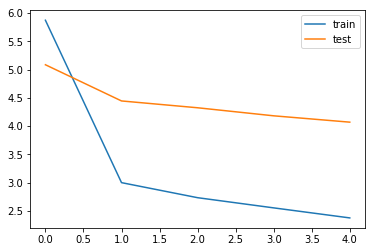

In [47]:
# 모델 플랏

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Prediction 

In [48]:
# 예측 
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[2]))
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],test_X.shape[2]))

In [49]:
# y 예측값 

yhat

array([[18.581795],
       [15.986043],
       [14.706213],
       ...,
       [24.629019],
       [24.752121],
       [22.785664]], dtype=float32)

In [51]:
# 역변환 (정규화)

inv_yhat = concatenate((yhat, test_X[:,1:]), axis=1)
inv_yhat_r= y_scaler.inverse_transform(inv_yhat)
inv_yhat_r= inv_yhat_r[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y_r= y_scaler.inverse_transform(inv_y)
inv_y_r = inv_y_r[:,0]

In [56]:
# 오차 계산 

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %f' % rmse)

Test RMSE: 1.136043


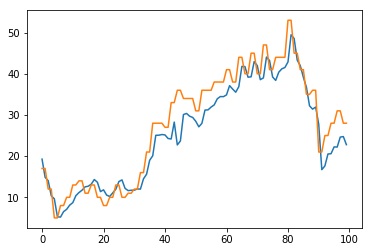

In [67]:
#100개 

pyplot.plot(inv_yhat[-100:,0], label = 'pred')
pyplot.plot(inv_y[-100:,0], label = 'true')
pyplot.show()

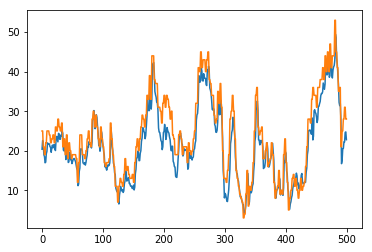

In [69]:
#500개 

pyplot.plot(inv_yhat[-500:,0])
pyplot.plot(inv_y[-500:,0])
pyplot.show()

In [1]:
#전체 

pyplot.plot(inv_yhat[:,0])
pyplot.plot(inv_y[:,0])
pyplot.show()

NameError: name 'pyplot' is not defined